The main object of this project was to get familiar with logistic regression. Logistic regression is one the most commonly used techniques in machine learning. The objective of this project was to build a model which can be improved by incremental tuning. This incremental tuning can be performed using Stochastic Gradient Descent. Since we are looking at data which evolves over time, SGD would be a good fit for this problem. The problem involves looking at data from 6 different days every subsequent day the data is rotated about 15 degrees. We want to train a classifier for one day and then be able to tune it for subsequent days while having similar accuracy. 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = np.loadtxt("/content/drive/My Drive/Colab Notebooks/day0.txt", delimiter=',')
X = data[:,:-1]
y = data[:,-1]

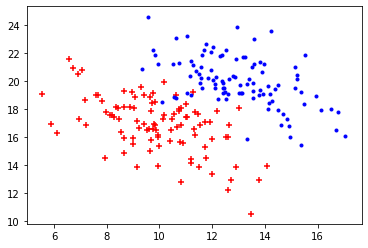

In [ ]:
plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r' )
plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b')


Gradient descent is a popular optimization technique used in deep and machine learning. Its basically the degree of change in the parameter with the amount of change in the other parameter. Its also a convex function, meaning if we take two points on the function and draw a straight line then the function would lie below the line. While using gradient descent the number of samples used for calculating the gradient is usually the whole dataset which is one of its major issues since it’s not scalable, if we had 1 billion point in our dataset we would have to perform a multiple of 1 billion computations to calculate the gradient, which is not very efficient, Stochastic Gradient Descent (SGD) picks one point from the dataset at random to calculate the gradient for every iteration, randomizing this point on every iteration and hence decreasing the time required for computation exponentially hence making the program more efficient. 

In [ ]:
def train(X, y, l_rate):
    clf = SGDClassifier(loss='log', penalty=None, learning_rate='constant', eta0=l_rate)
    
    loss_list = []
    for i in range(40000):

        clf.partial_fit(X, y, classes=np.unique(y))
        if i % 100 ==0:
          clf_probs = clf.predict_proba(X)  
          loss_list.append(log_loss(y,clf_probs))

    return loss_list

# Model Training with different learning rates
l_rates = [1e-5, 1e-4,1e-2,1e-3]

loss_lists = []
for l_rate in l_rates:
    loss_list = train(X, y, l_rate)
    loss_lists.append(loss_list)  

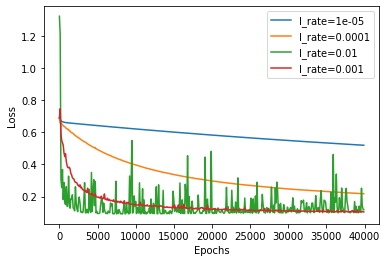

In [ ]:
fig = plt.figure()
for i in range(len(loss_lists)):
    plt.plot(np.arange(0,40000,100), loss_lists[i], label='l_rate={}'.format(l_rates[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')

In [ ]:
cls = SGDClassifier(loss='log', penalty=None, learning_rate='constant', eta0=0.001,max_iter=40000,tol=None)
cls.fit(X,y)
print('Train accuracy = {}%'.format(100*cls.score(X, y)))

Train accuracy = 96.0%


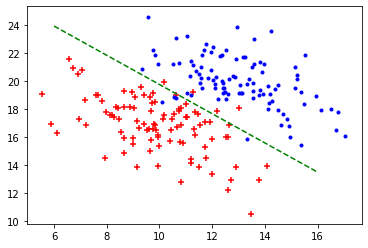

In [ ]:
b0 = cls.intercept_
b1 = cls.coef_[0][0] 
b2 = cls.coef_[0][1]
x1 = np.linspace(6,16)
x2 = ((-b0) - (b1*x1))/b2

plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r')
plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b')
plt.plot(x1, x2, color="g", linestyle="--", marker=None) # Draw the decision boundary


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Train accuracy = 93.0%
day =/content/drive/My Drive/Colab Notebooks/day1.txt
Train accuracy = 97.0%
day =/content/drive/My Drive/Colab Notebooks/day2.txt
16
Train accuracy = 95.0%
day =/content/drive/My Drive/Colab Notebooks/day3.txt
16
Train accuracy = 95.0%
day =/content/drive/My Drive/Colab Notebooks/day4.txt
16
Train accuracy = 94.0%
day =/content/drive/My Drive/Colab Notebooks/day5.txt
16


No handles with labels found to put in legend.


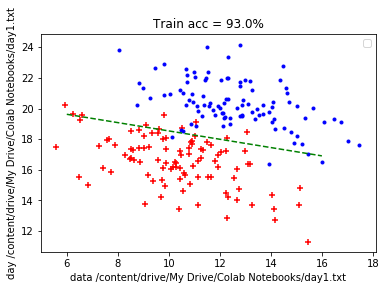

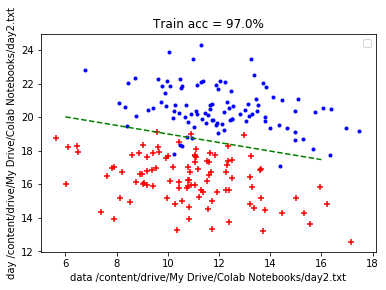

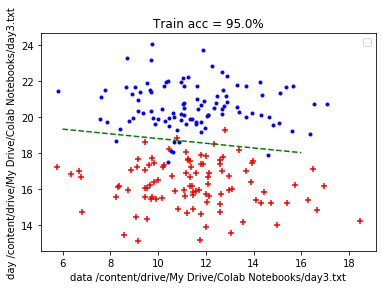

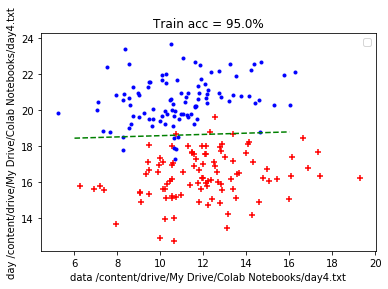

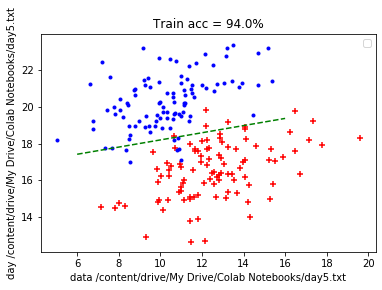

In [ ]:
for i in range (1,6):
  filename = '/content/drive/My Drive/Colab Notebooks/day%d.txt' % i 
  day_i = np.loadtxt(filename, delimiter=',')
  X = day_i[:,:-1]
  y = day_i[:,-1]

  
  for k in range(17):
    cls.partial_fit(X, y, classes=np.unique(y))
    acc = 100*cls.score(X,y)
  print('Train accuracy = {}%'.format(acc))
  print('day ={}'.format(filename))
  if (acc > 93):
    print(k)

  b0 = cls.intercept_
  b1 = cls.coef_[0][0] 
  b2 = cls.coef_[0][1]
  x1 = np.linspace(6,16)
  x2 = ((-b0) - (b1*x1))/b2


  plt.figure()
  plt.title("Train acc = {}%".format(acc))
  plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r')
  plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b')
  plt.xlabel("data {}".format(filename))    
  plt.ylabel("day {}".format(filename))
  plt.plot(x1, x2, color="g", linestyle="--", marker=None) # Draw the decision boundary
  plt.legend()
  plt.plot


During my testing I tried several different values for epochs to see which gave the best results. An epoch of 16 was finalized since it wasn’t too high and the training accuracies it provided were all above 93% which is very close to that of day0. The accuracies would get slightly better with higher values of k (epochs), in my testing a value of 99 provided greater than 94% accuracy on all days. Incremental learning improves the efficiency of logistic regression classifiers as we can see from the results above, this is mainly due to the small changes we can make to better adapt to our datasets.
